<a href="https://colab.research.google.com/github/NasimulNabil/Final-Defense/blob/main/Final_Deep_(Prediction_of_Credit_Recovery_with_Feature_Imporatance_in_Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Research/loan_data_feature.csv')
df.head()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,good_credit,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,1,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1.0,1.0,1.0,1,1,1,14850.0,14850.0,18450.0,20250.0,22050.0,23850.0,1,0,0,1,1,0,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,8000.0,1.0,1.0,1000,1000,1500,123500.0,137700.0,151900.0,165600.0,178800.0,191500.0,1,0,0,1,1,0,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1.0,1.0,1.0,5000,1,1,113300.0,127500.0,141700.0,151400.0,165600.0,179800.0,1,0,0,1,1,0,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1.0,1.0,1.0,1,1,1,93600.0,107800.0,122000.0,136200.0,150400.0,164600.0,1,0,0,1,1,0,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,1.0,1.0,1.0,1,1,5000,90304.0,101560.0,112816.0,124072.0,135328.0,141584.0,5,1,0,1,1,0,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
df.drop(['mean_pay_amount','long_term','mean_bill_amount','interest_free','repayment_frequencyMonth','staff_loan','agri_loan'],axis=1,inplace=True)
df.shape

(4600, 43)

In [ ]:
x = df.drop(['good_credit'],axis=1)
x.head()

,emi_loan,individual_loan,consumer_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMoreThanMonth,total_bill_amount,total_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,0,1,0,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1.0,1.0,1.0,1,1,1,14850.0,14850.0,18450.0,20250.0,22050.0,23850.0,1,0,1,0,114300.0,6.0,1.157407,19050.000000,68.306011,10.750000
1,1,1,0,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,8000.0,1.0,1.0,1000,1000,1500,123500.0,137700.0,151900.0,165600.0,178800.0,191500.0,1,0,1,0,949000.0,11502.0,1.408451,82.507390,495.049505,1.514085
2,1,1,0,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1.0,1.0,1.0,5000,1,1,113300.0,127500.0,141700.0,151400.0,165600.0,179800.0,1,0,1,0,879300.0,5005.0,1.408451,175.684316,485.436893,2.338028
3,1,1,0,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1.0,1.0,1.0,1,1,1,93600.0,107800.0,122000.0,136200.0,150400.0,164600.0,1,0,1,0,774600.0,6.0,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,1.0,1.0,1.0,1,1,5000,90304.0,101560.0,112816.0,124072.0,135328.0,141584.0,5,0,1,0,705664.0,5005.0,7.456341,140.991808,2764.705882,1.421464


In [ ]:
y = df['good_credit']
y

0       0
1       0
2       0
3       0
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: good_credit, Length: 4600, dtype: int64

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

{0: 3698, 1: 3698}

In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
scale_inputs = standardization.fit_transform(x_sm)

In [ ]:
x_sm = scale_inputs
x_sm

array([[-1.43218543,  0.36962427, -0.40811949, ..., -0.12000342,
        -0.28877098,  1.33288956],
       [ 0.69823361,  0.36962427, -0.40811949, ..., -0.22662386,
         0.10644307, -0.52941623],
       [ 0.69823361,  0.36962427, -0.40811949, ..., -0.2261001 ,
         0.09754067, -0.36327839],
       ...,
       [ 0.69823361,  0.36962427, -0.40811949, ..., -0.2270901 ,
         0.51070672,  1.89292168],
       [ 0.69823361,  0.36962427, -0.40811949, ..., -0.11522538,
        -0.27164349, -0.58602616],
       [-1.43218543,  0.36962427, -0.40811949, ..., -0.17430688,
        -0.2801202 , -0.83471226]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5916, 42)
(1480, 42)


### **ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras

ann = keras.Sequential([
        keras.layers.Dense(500,input_shape=(42,),activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                            
])

ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 1s 5ms/step - loss: 0.4901 - accuracy: 0.7557
Epoch 2/100
185/185 [==============================] - 1s 5ms/step - loss: 0.4165 - accuracy: 0.8049
Epoch 3/100
185/185 [==============================] - 1s 5ms/step - loss: 0.3911 - accuracy: 0.8200
Epoch 4/100
185/185 [==============================] - 1s 5ms/step - loss: 0.3693 - accuracy: 0.8252
Epoch 5/100
185/185 [==============================] - 1s 5ms/step - loss: 0.3555 - accuracy: 0.8318
Epoch 6/100
185/185 [==============================] - 1s 5ms/step - loss: 0.3389 - accuracy: 0.8448
Epoch 7/100
185/185 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8534
Epoch 8/100
185/185 [==============================] - 1s 4ms/step - loss: 0.3057 - accuracy: 0.8646
Epoch 9/100
185/185 [==============================] - 1s 4ms/step - loss: 0.2975 - accuracy: 0.8663
Epoch 10/100
185/185 [==============================] - 1s 5ms/step - loss: 0.2981 - accura

In [ ]:
import numpy as np
loss = np.mean(history.history['loss'])
accuracy = np.mean(history.history['accuracy'])
print("Training Loss: ",loss)
print("Training Accuracy: ",accuracy)

Training Loss:  0.12275674495846033
Training Accuracy:  0.949795469045639


Text(0.5, 1.0, 'Training Loss')

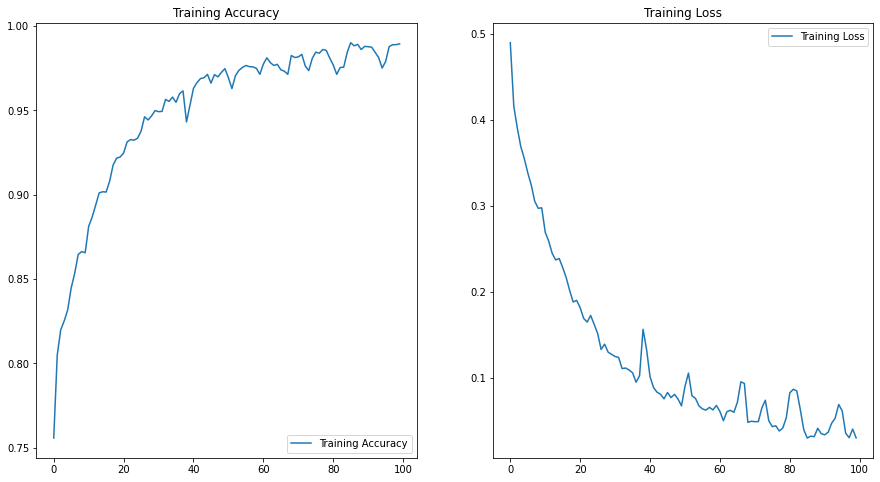

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
ann.evaluate(x_test,y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.8993


[0.6252630949020386, 0.8993242979049683]

In [ ]:
y_pred = ann.predict(x_test)
y_pred

array([[9.9981439e-01],
       [5.4418382e-07],
       [1.0000000e+00],
       ...,
       [9.9870235e-01],
       [9.9985689e-01],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y_test[:20]

468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64

In [ ]:
y_pred[:20]

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1.], dtype=float32)

In [ ]:
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_absolute_error,mean_squared_error,matthews_corrcoef
# accuracy: (tp + tn) / (p + n)
scores = ann.evaluate(x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, ann.predict(x_test))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mcc = matthews_corrcoef(y_test,y_pred)

results_deep_learning = []
results_deep_learning.append({
    'model': "ANN",
    'Training Loss': np.mean(history.history['loss']),
    'Training Accuracy': np.mean(history.history['accuracy']),
    'Testing Loss': scores[0],
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc,
    'MAE': mae,
    'RMSE': rmse,
    'MCC': mcc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Training Loss','Training Accuracy','Testing Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

47/47 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.8993


,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.89243,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772


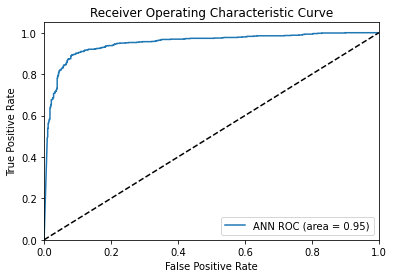

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, ann.predict(x_test))
auc = roc_auc_score(y_test,ann.predict(x_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('ANN', auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Text(69.0, 0.5, 'True Output')

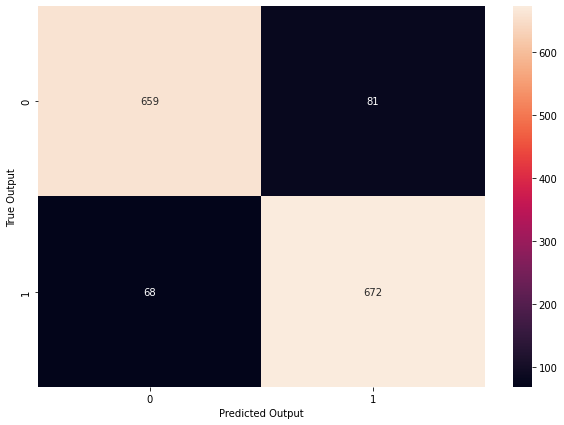

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       740
           1       0.89      0.91      0.90       740

    accuracy                           0.90      1480
   macro avg       0.90      0.90      0.90      1480
weighted avg       0.90      0.90      0.90      1480



### **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(800,700),max_iter=8000,activation='relu')
history = mlp.fit(x_train,y_train)

In [ ]:
mlp.score(x_test,y_test)

0.8864864864864865

In [ ]:
y_pred = mlp.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test[:20]

468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64

In [ ]:
y_pred[:20]

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_absolute_error,mean_squared_error,matthews_corrcoef
# accuracy: (tp + tn) / (p + n)

accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, mlp.predict_proba(x_test)[:,1])
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mcc = matthews_corrcoef(y_test,y_pred)

results_deep_learning.append({
    'model': "MLP",
    # 'Training Loss': np.mean(history.history['loss']),
    # 'Training Accuracy': np.mean(history.history['accuracy']),
    # 'Testing Loss': scores[0],
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc,
    'MAE': mae,
    'RMSE': rmse,
    'MCC': mcc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Training Loss','Training Accuracy','Testing Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.892430,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772
1,MLP,NaN,NaN,NaN,0.886486,0.874346,0.902703,0.888298,0.944779,0.113514,0.336918,0.773380


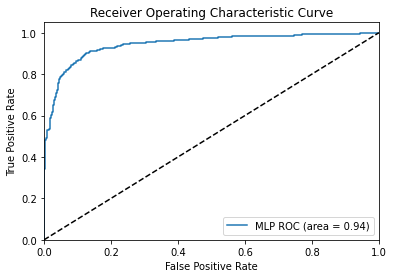

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test,mlp.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('MLP', auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Text(69.0, 0.5, 'True Output')

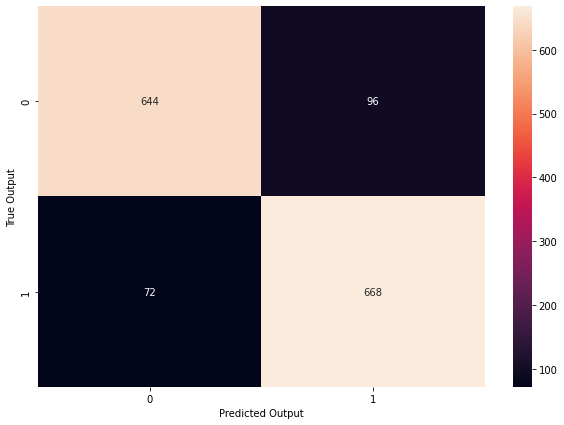

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       740
           1       0.87      0.90      0.89       740

    accuracy                           0.89      1480
   macro avg       0.89      0.89      0.89      1480
weighted avg       0.89      0.89      0.89      1480



### **CNN**

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5916, 42)
(1480, 42)


In [ ]:
x_train = x_train.reshape((len(x_train),42,1))
x_train.shape

(5916, 42, 1)

In [ ]:
x_test = x_test.reshape((len(x_test),42,1))
x_test.shape

(1480, 42, 1)

In [ ]:
cnn = keras.Sequential([
        keras.layers.Conv1D(filters=200,kernel_size=3,padding='same',activation='relu',input_shape=(42,1)),
        keras.layers.MaxPooling1D((2,)),
    
        keras.layers.Conv1D(filters=100,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),                           
        
        keras.layers.Conv1D(filters=50,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),                           
        
        keras.layers.Conv1D(filters=30,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),

        keras.layers.Flatten(),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                           
])

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 4s 18ms/step - loss: 0.5454 - accuracy: 0.7101
Epoch 2/100
185/185 [==============================] - 3s 18ms/step - loss: 0.4451 - accuracy: 0.7875
Epoch 3/100
185/185 [==============================] - 3s 18ms/step - loss: 0.4188 - accuracy: 0.8019
Epoch 4/100
185/185 [==============================] - 3s 18ms/step - loss: 0.4013 - accuracy: 0.8127
Epoch 5/100
185/185 [==============================] - 3s 19ms/step - loss: 0.3765 - accuracy: 0.8281
Epoch 6/100
185/185 [==============================] - 3s 18ms/step - loss: 0.3572 - accuracy: 0.8425
Epoch 7/100
185/185 [==============================] - 3s 18ms/step - loss: 0.3452 - accuracy: 0.8469
Epoch 8/100
185/185 [==============================] - 3s 17ms/step - loss: 0.3311 - accuracy: 0.8553
Epoch 9/100
185/185 [==============================] - 4s 19ms/step - loss: 0.3190 - accuracy: 0.8595
Epoch 10/100
185/185 [==============================] - 3s 18ms/step - loss: 0.311

In [ ]:
import numpy as np
loss = np.mean(history.history['loss'])
accuracy = np.mean(history.history['accuracy'])
print("Training Loss: ",loss)
print("Training Accuracy: ",accuracy)

Training Loss:  0.13046738026663662
Training Accuracy:  0.9454411774873733


Text(0.5, 1.0, 'Training Loss')

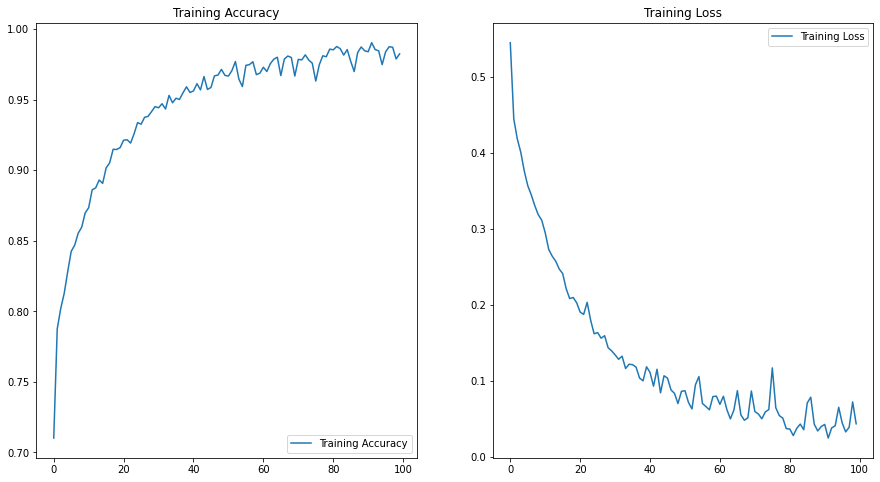

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
cnn.evaluate(x_test, y_test)

47/47 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.8878


[0.638944149017334, 0.887837827205658]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred

array([[9.6443456e-01],
       [1.0537152e-06],
       [1.0000000e+00],
       ...,
       [9.9972540e-01],
       [9.8914802e-01],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y_test[:20]

468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64

In [ ]:
y_pred[:20]

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1.], dtype=float32)

In [ ]:
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_absolute_error,mean_squared_error,matthews_corrcoef
# accuracy: (tp + tn) / (p + n)
scores = cnn.evaluate(x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, cnn.predict(x_test))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mcc = matthews_corrcoef(y_test,y_pred)

results_deep_learning.append({
    'model': "CNN",
    'Training Loss': np.mean(history.history['loss']),
    'Training Accuracy': np.mean(history.history['accuracy']),
    'Testing Loss': scores[0],
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc,
    'MAE': mae,
    'RMSE': rmse,
    'MCC': mcc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Training Loss','Training Accuracy','Testing Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

47/47 [==============================] - 0s 5ms/step - loss: 0.6389 - accuracy: 0.8878


,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.892430,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772
1,MLP,NaN,NaN,NaN,0.886486,0.874346,0.902703,0.888298,0.944779,0.113514,0.336918,0.773380
2,CNN,0.130467,0.945441,0.638944,0.887838,0.894231,0.879730,0.886921,0.948784,0.112162,0.334906,0.775778


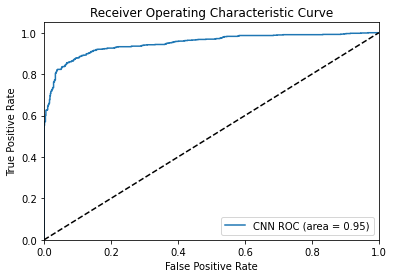

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, cnn.predict(x_test))
auc = roc_auc_score(y_test,cnn.predict(x_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('CNN', auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Text(69.0, 0.5, 'True Output')

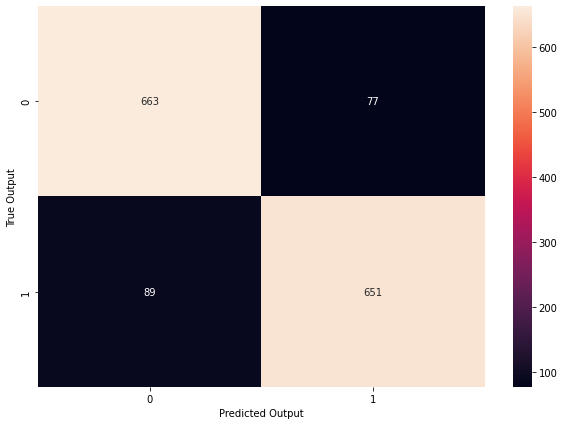

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       740
           1       0.89      0.88      0.89       740

    accuracy                           0.89      1480
   macro avg       0.89      0.89      0.89      1480
weighted avg       0.89      0.89      0.89      1480



### **RNN**

In [ ]:
rnn = keras.Sequential([
        keras.layers.SimpleRNN(500,input_shape=(42,1),activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                            
])

rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = rnn.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 21s 105ms/step - loss: 0.5900 - accuracy: 0.6753
Epoch 2/100
185/185 [==============================] - 19s 105ms/step - loss: 0.5505 - accuracy: 0.6979
Epoch 3/100
185/185 [==============================] - 20s 107ms/step - loss: 0.5440 - accuracy: 0.7006
Epoch 4/100
185/185 [==============================] - 20s 109ms/step - loss: 0.5350 - accuracy: 0.7115
Epoch 5/100
185/185 [==============================] - 20s 108ms/step - loss: 0.5243 - accuracy: 0.7140
Epoch 6/100
185/185 [==============================] - 19s 104ms/step - loss: 0.5238 - accuracy: 0.7213
Epoch 7/100
185/185 [==============================] - 20s 108ms/step - loss: 0.5149 - accuracy: 0.7245
Epoch 8/100
185/185 [==============================] - 20s 107ms/step - loss: 0.5084 - accuracy: 0.7245
Epoch 9/100
185/185 [==============================] - 20s 105ms/step - loss: 0.5005 - accuracy: 0.7392
Epoch 10/100
185/185 [==============================] - 20s 109m

In [ ]:
import numpy as np
loss = np.mean(history.history['loss'])
accuracy = np.mean(history.history['accuracy'])
print("Training Loss: ",loss)
print("Training Accuracy: ",accuracy)

Training Loss:  0.39601056307554244
Training Accuracy:  0.8073782914876938


Text(0.5, 1.0, 'Training Loss')

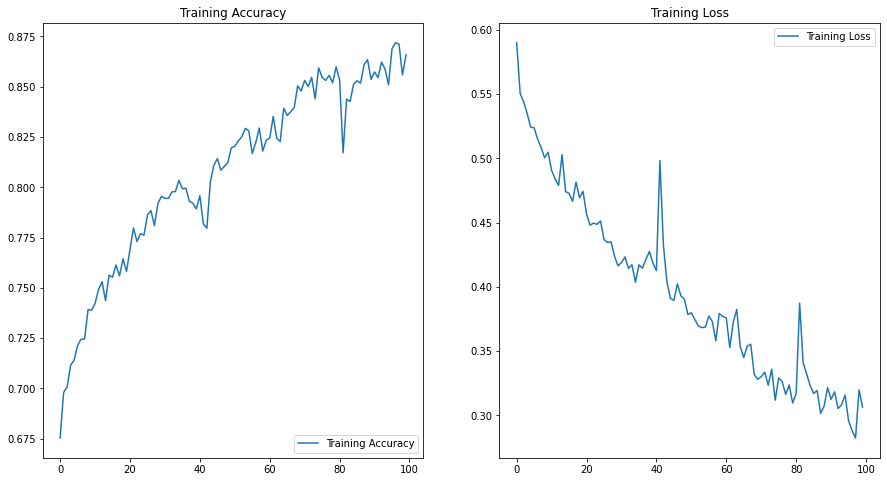

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
rnn.evaluate(x_test, y_test)

47/47 [==============================] - 2s 37ms/step - loss: 0.4812 - accuracy: 0.7953


[0.48115476965904236, 0.7952702641487122]

In [ ]:
y_pred = rnn.predict(x_test)
y_pred

array([[0.7915573 ],
       [0.70438755],
       [0.99999976],
       ...,
       [0.38848397],
       [0.09141219],
       [0.9999975 ]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 1., 1., ..., 0., 0., 1.], dtype=float32)

In [ ]:
y_test[:20]

468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64

In [ ]:
y_pred[:20]

array([1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_absolute_error,mean_squared_error,matthews_corrcoef
# accuracy: (tp + tn) / (p + n)
scores = rnn.evaluate(x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, rnn.predict(x_test))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mcc = matthews_corrcoef(y_test,y_pred)

results_deep_learning.append({
    'model': "RNN",
    'Training Loss': np.mean(history.history['loss']),
    'Training Accuracy': np.mean(history.history['accuracy']),
    'Testing Loss': scores[0],
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc,
    'MAE': mae,
    'RMSE': rmse,
    'MCC': mcc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Training Loss','Training Accuracy','Testing Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

47/47 [==============================] - 2s 36ms/step - loss: 0.4812 - accuracy: 0.7953


,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.892430,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772
1,MLP,NaN,NaN,NaN,0.886486,0.874346,0.902703,0.888298,0.944779,0.113514,0.336918,0.773380
2,CNN,0.130467,0.945441,0.638944,0.887838,0.894231,0.879730,0.886921,0.948784,0.112162,0.334906,0.775778
3,RNN,0.396011,0.807378,0.481155,0.795270,0.820852,0.755405,0.786770,0.867286,0.204730,0.452471,0.592427


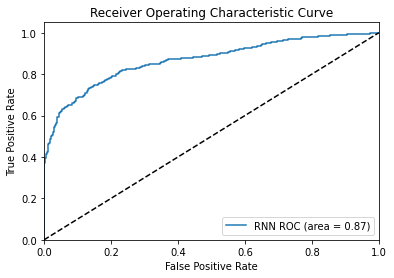

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rnn.predict(x_test))
auc = roc_auc_score(y_test,rnn.predict(x_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RNN', auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Text(69.0, 0.5, 'True Output')

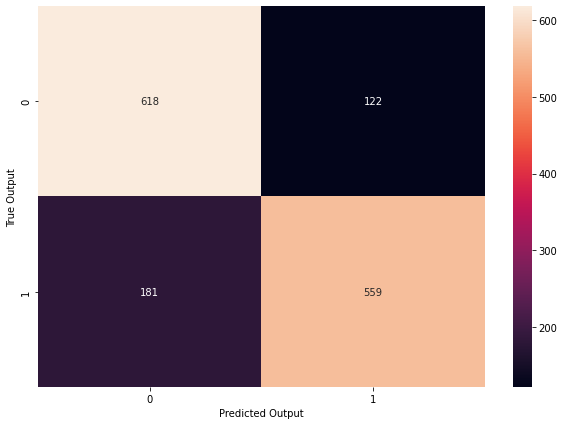

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       740
           1       0.82      0.76      0.79       740

    accuracy                           0.80      1480
   macro avg       0.80      0.80      0.79      1480
weighted avg       0.80      0.80      0.79      1480



### **LSTM**

In [ ]:
lstm = keras.Sequential([
        keras.layers.Dense(512,kernel_initializer='uniform',input_shape=(42,1)),                    
        keras.layers.LSTM(64,return_sequences=True,dropout=0.1, recurrent_dropout=0.1,activation='relu'),                  
        keras.layers.LSTM(64,activation='relu'),                  
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')                  
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 38s 180ms/step - loss: 0.6532 - accuracy: 0.6285
Epoch 2/100
185/185 [==============================] - 33s 178ms/step - loss: 0.5717 - accuracy: 0.6875
Epoch 3/100
185/185 [==============================] - 33s 177ms/step - loss: 0.6142 - accuracy: 0.6751
Epoch 4/100
185/185 [==============================] - 33s 179ms/step - loss: 0.5508 - accuracy: 0.7005
Epoch 5/100
185/185 [==============================] - 33s 179ms/step - loss: 0.5241 - accuracy: 0.7020
Epoch 6/100
185/185 [==============================] - 33s 181ms/step - loss: 0.5161 - accuracy: 0.7211
Epoch 7/100
185/185 [==============================] - 34s 182ms/step - loss: 0.5171 - accuracy: 0.7230
Epoch 8/100
185/185 [==============================] - 33s 178ms/step - loss: 0.5043 - accuracy: 0.7253
Epoch 9/100
185/185 [==============================] - 34s 181ms/step - loss: 0.4966 - accuracy: 0.7333
Epoch 10/100
185/185 [==============================] - 34s 182m

In [ ]:
import numpy as np
loss = np.mean(history.history['loss'])
accuracy = np.mean(history.history['accuracy'])
print("Training Loss: ",loss)
print("Training Accuracy: ",accuracy)

Training Loss:  0.38745808362960815
Training Accuracy:  0.8158502370119095


Text(0.5, 1.0, 'Training Loss')

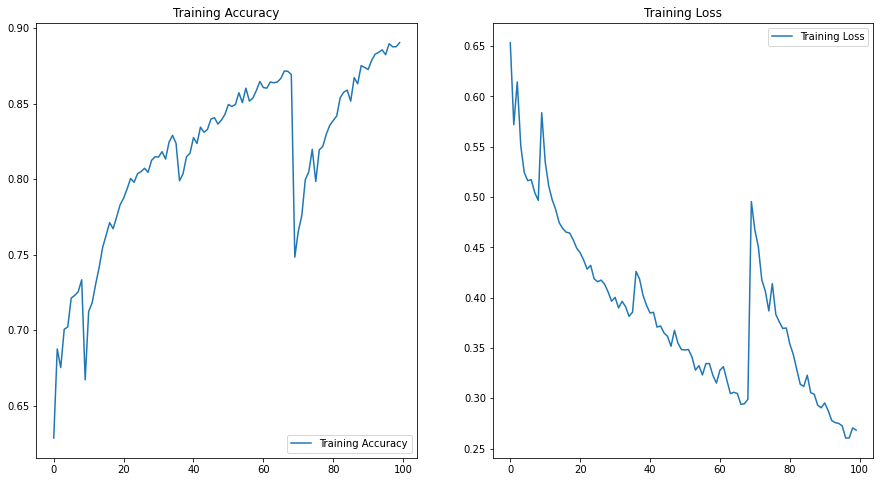

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
lstm.evaluate(x_test, y_test)

47/47 [==============================] - 2s 29ms/step - loss: 0.3869 - accuracy: 0.8480


[0.38687577843666077, 0.8479729890823364]

In [ ]:
y_pred = lstm.predict(x_test)
y_pred

array([[0.35935766],
       [0.00540444],
       [0.9999991 ],
       ...,
       [0.1063368 ],
       [0.99062186],
       [0.99999905]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [ ]:
y_test[:20]

468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64

In [ ]:
y_pred[:20]

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_absolute_error,mean_squared_error,matthews_corrcoef
# accuracy: (tp + tn) / (p + n)
scores = lstm.evaluate(x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, lstm.predict(x_test))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mcc = matthews_corrcoef(y_test,y_pred)

results_deep_learning.append({
    'model': "LSTM",
    'Training Loss': np.mean(history.history['loss']),
    'Training Accuracy': np.mean(history.history['accuracy']),
    'Testing Loss': scores[0],
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc,
    'MAE': mae,
    'RMSE': rmse,
    'MCC': mcc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Training Loss','Training Accuracy','Testing Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

47/47 [==============================] - 1s 29ms/step - loss: 0.3869 - accuracy: 0.8480


,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.892430,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772
1,MLP,NaN,NaN,NaN,0.886486,0.874346,0.902703,0.888298,0.944779,0.113514,0.336918,0.773380
2,CNN,0.130467,0.945441,0.638944,0.887838,0.894231,0.879730,0.886921,0.948784,0.112162,0.334906,0.775778
3,RNN,0.396011,0.807378,0.481155,0.795270,0.820852,0.755405,0.786770,0.867286,0.204730,0.452471,0.592427
4,LSTM,0.387458,0.815850,0.386876,0.847973,0.894334,0.789189,0.838478,0.909832,0.152027,0.389906,0.700806


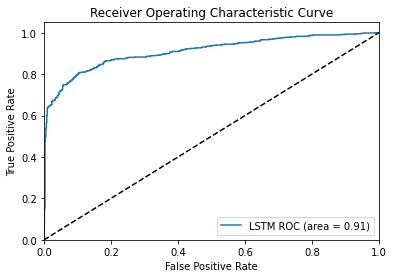

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lstm.predict(x_test))
auc = roc_auc_score(y_test,lstm.predict(x_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LSTM', auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Text(69.0, 0.5, 'True Output')

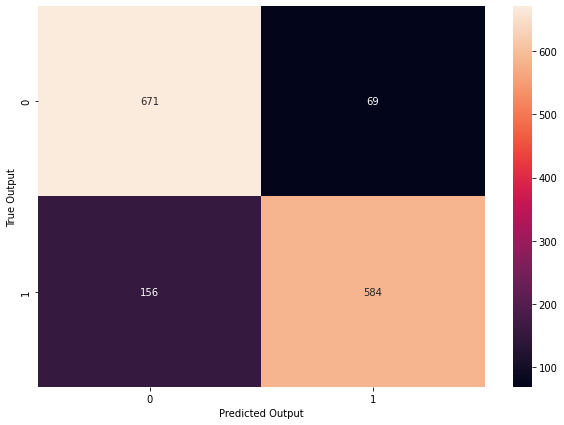

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       740
           1       0.89      0.79      0.84       740

    accuracy                           0.85      1480
   macro avg       0.85      0.85      0.85      1480
weighted avg       0.85      0.85      0.85      1480



### **GRU**

In [ ]:
gru = keras.Sequential([
        keras.layers.Dense(512,kernel_initializer='uniform',input_shape=(42,1)),                    
        keras.layers.GRU(64,return_sequences=True,activation='relu'),                  
        keras.layers.GRU(64,activation='relu'),                  
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')                  
])

gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = gru.fit(x_train, y_train, epochs=100)

Epoch 1/100
185/185 [==============================] - 20s 94ms/step - loss: 0.6127 - accuracy: 0.6464
Epoch 2/100
185/185 [==============================] - 18s 95ms/step - loss: 0.5484 - accuracy: 0.7010
Epoch 3/100
185/185 [==============================] - 17s 91ms/step - loss: 0.5322 - accuracy: 0.7115
Epoch 4/100
185/185 [==============================] - 17s 94ms/step - loss: 0.5122 - accuracy: 0.7228
Epoch 5/100
185/185 [==============================] - 17s 93ms/step - loss: 0.4955 - accuracy: 0.7365
Epoch 6/100
185/185 [==============================] - 17s 94ms/step - loss: 0.4848 - accuracy: 0.7473
Epoch 7/100
185/185 [==============================] - 17s 93ms/step - loss: 0.4809 - accuracy: 0.7529
Epoch 8/100
185/185 [==============================] - 17s 91ms/step - loss: 0.4653 - accuracy: 0.7732
Epoch 9/100
185/185 [==============================] - 17s 93ms/step - loss: 0.4528 - accuracy: 0.7748
Epoch 10/100
185/185 [==============================] - 17s 90ms/step - l

In [ ]:
import numpy as np
loss = np.mean(history.history['loss'])
accuracy = np.mean(history.history['accuracy'])
print("Training Loss: ",loss)
print("Training Accuracy: ",accuracy)

Training Loss:  0.22653805904090404
Training Accuracy:  0.8979783636331559


Text(0.5, 1.0, 'Training Loss')

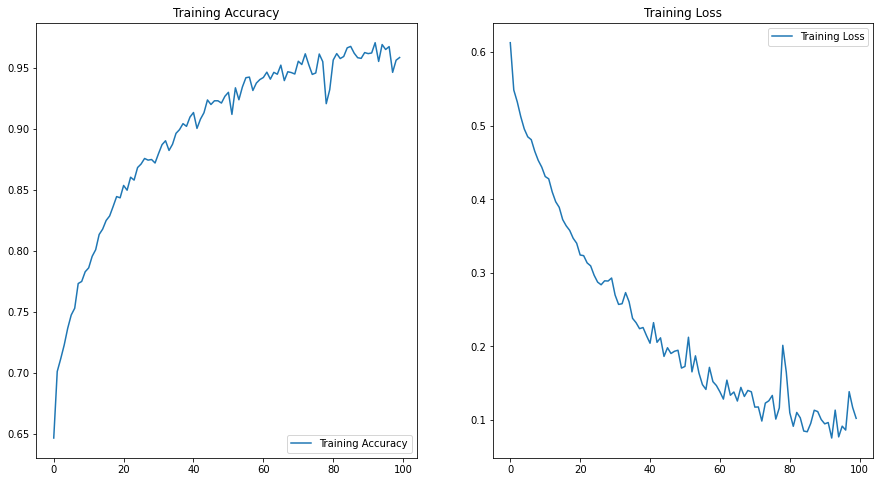

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title("Training Accuracy")

plt.subplot(1,2,2)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title("Training Loss")

In [ ]:
gru.evaluate(x_test, y_test)

47/47 [==============================] - 2s 24ms/step - loss: 0.6081 - accuracy: 0.8561


[0.6080692410469055, 0.8560810685157776]

In [ ]:
y_pred = gru.predict(x_test)
y_pred

array([[0.9947382 ],
       [0.03674969],
       [0.99997526],
       ...,
       [0.98807514],
       [0.99999785],
       [1.        ]], dtype=float32)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = y_pred[:,0]
y_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y_test[:20]

468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64

In [ ]:
y_pred[:20]

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1.], dtype=float32)

In [ ]:
import math
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_absolute_error,mean_squared_error,matthews_corrcoef
# accuracy: (tp + tn) / (p + n)
scores = gru.evaluate(x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, gru.predict(x_test))
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mcc = matthews_corrcoef(y_test,y_pred)

results_deep_learning.append({
    'model': "GRU",
    'Training Loss': np.mean(history.history['loss']),
    'Training Accuracy': np.mean(history.history['accuracy']),
    'Testing Loss': scores[0],
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc,
    'MAE': mae,
    'RMSE': rmse,
    'MCC': mcc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Training Loss','Training Accuracy','Testing Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

47/47 [==============================] - 1s 22ms/step - loss: 0.6081 - accuracy: 0.8561


,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.892430,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772
1,MLP,NaN,NaN,NaN,0.886486,0.874346,0.902703,0.888298,0.944779,0.113514,0.336918,0.773380
2,CNN,0.130467,0.945441,0.638944,0.887838,0.894231,0.879730,0.886921,0.948784,0.112162,0.334906,0.775778
3,RNN,0.396011,0.807378,0.481155,0.795270,0.820852,0.755405,0.786770,0.867286,0.204730,0.452471,0.592427
4,LSTM,0.387458,0.815850,0.386876,0.847973,0.894334,0.789189,0.838478,0.909832,0.152027,0.389906,0.700806
5,GRU,0.226538,0.897978,0.608069,0.856081,0.860465,0.850000,0.855201,0.919370,0.143919,0.379366,0.712215


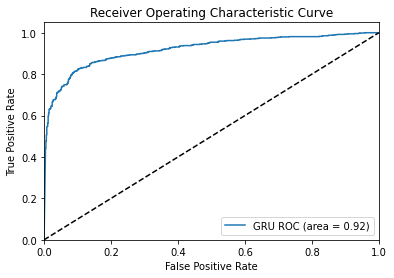

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gru.predict(x_test))
auc = roc_auc_score(y_test,gru.predict(x_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('GRU', auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Text(69.0, 0.5, 'True Output')

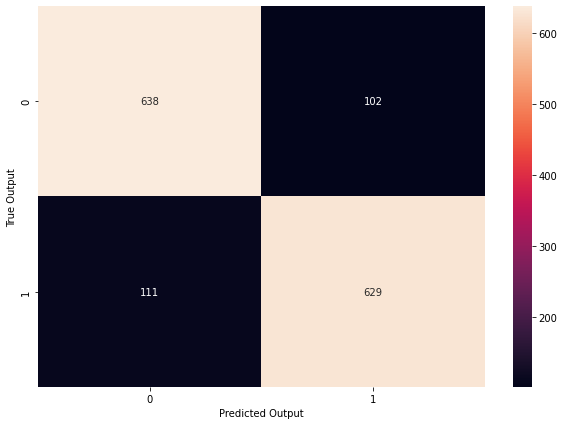

In [ ]:
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       740
           1       0.86      0.85      0.86       740

    accuracy                           0.86      1480
   macro avg       0.86      0.86      0.86      1480
weighted avg       0.86      0.86      0.86      1480



In [ ]:
models = {
     'ANN': ann,
     'MLP': mlp,
     'CNN': cnn,
     'RNN': rnn,
     'LSTM': lstm,
     'GRU': gru,
}

In [ ]:
x_test.shape

(1480, 42, 1)

In [ ]:
x_test_2d = x_test
x_test_2d = x_test_2d.reshape(x_test_2d.shape[0],x_test_2d.shape[1]*1)

In [ ]:
x_test_2d.shape

(1480, 42)

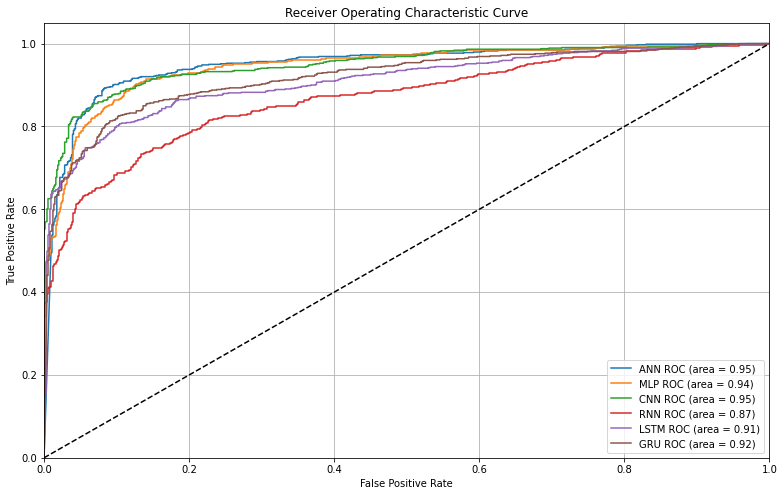

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(13,8))
# for name,model in list(models.items()):
#   fpr, tpr, thresholds = roc_curve(y_test, model.predict(x_test))
#   auc = roc_auc_score(y_test,model.predict(x_test))
#   plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))

for key in list(models.keys()):
  if key == 'ANN':
    fpr, tpr, thresholds = roc_curve(y_test, models[key].predict(x_test_2d))
    auc = roc_auc_score(y_test,models[key].predict(x_test_2d))
  elif key == 'MLP':
    fpr, tpr, thresholds = roc_curve(y_test, models[key].predict_proba(x_test_2d)[:, 1])
    auc = roc_auc_score(y_test,models[key].predict_proba(x_test_2d)[:, 1])
  else:
    fpr, tpr, thresholds = roc_curve(y_test, models[key].predict(x_test))
    auc = roc_auc_score(y_test,models[key].predict(x_test))

  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show() 

In [ ]:
df

,model,Training Loss,Training Accuracy,Testing Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,ANN,0.122757,0.949795,0.625263,0.899324,0.892430,0.908108,0.900201,0.949425,0.100676,0.317294,0.798772
1,MLP,NaN,NaN,NaN,0.886486,0.874346,0.902703,0.888298,0.944779,0.113514,0.336918,0.773380
2,CNN,0.130467,0.945441,0.638944,0.887838,0.894231,0.879730,0.886921,0.948784,0.112162,0.334906,0.775778
3,RNN,0.396011,0.807378,0.481155,0.795270,0.820852,0.755405,0.786770,0.867286,0.204730,0.452471,0.592427
4,LSTM,0.387458,0.815850,0.386876,0.847973,0.894334,0.789189,0.838478,0.909832,0.152027,0.389906,0.700806
5,GRU,0.226538,0.897978,0.608069,0.856081,0.860465,0.850000,0.855201,0.919370,0.143919,0.379366,0.712215


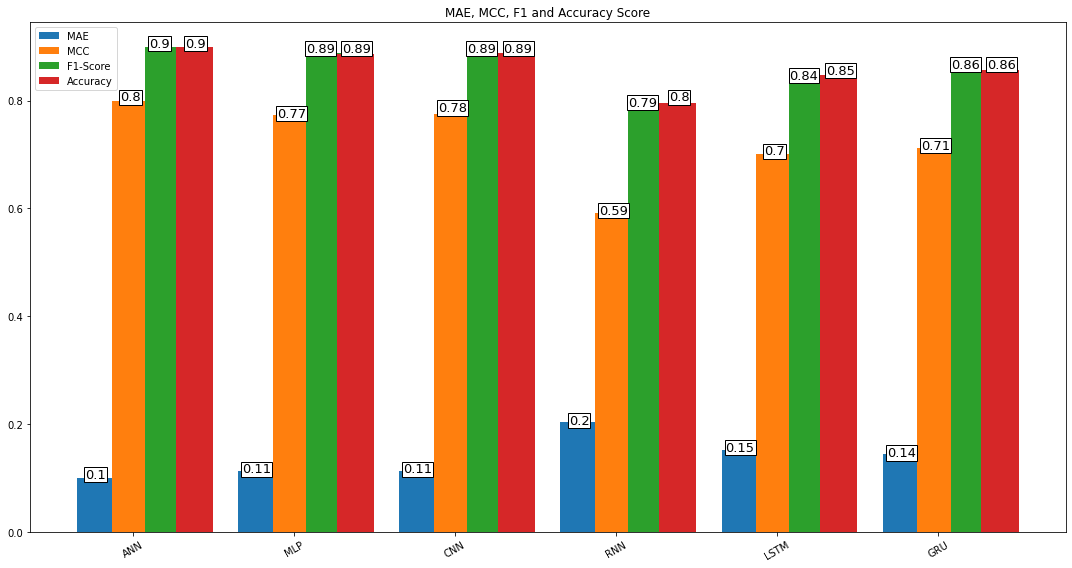

In [ ]:
x = np.arange(len(df['model']))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
# rects1 = ax.bar(x + width/2, df['Precision'], width, label='F1-Score')
rects1 = ax.bar(x-width, df['MAE'], width, label='MAE')
rects2 = ax.bar(x - width/15, df['MCC'], width, label='MCC')
rects3 = ax.bar(x + width/1.2, df['F1-Score'], width, label='F1-Score')
rects4 = ax.bar(x + width/1.2 + width/1.2, df['Accuracy_Score'], width, label='Accuracy')

# ax.set_ylabel('MAE, MCC, F1 and Accuracy')
ax.set_title('MAE, MCC, F1 and Accuracy Score')
ax.set_xticks(x)
plt.xticks(rotation=30)
ax.set_xticklabels(df['model'])
for i in range(len(df['model'])):
  plt.text(i-width,round(df['MAE'][i],2), round(df['MAE'][i],2),ha="center",size=13,bbox = {
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
  plt.text(i - width/15,round(df['MCC'][i],2), round(df['MCC'][i],2),ha="center",size=13,bbox = {  
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
  plt.text(i + 0.2/1.2,round(df['F1-Score'][i],2), round(df['F1-Score'][i],2),ha="center",size=13,bbox = {  
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
  plt.text(i + width/1.2 + 0.20,round(df['Accuracy_Score'][i],2), round(df['Accuracy_Score'][i],2),ha="center",size=13,bbox = {
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
ax.legend()

fig.tight_layout()  

plt.show()